# **1. Preprocesamiento del dataset**

In [320]:
!pip install -q kagglehub

In [321]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/52000-animation-movie-details-dataset-2024")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/asaniczka/52000-animation-movie-details-dataset-2024/versions/1


In [322]:
# Tamaño del dataset
print(f"Filas y columnas: {df.shape}")

Filas y columnas: (51945, 24)


In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [324]:
# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Cargar CSV
import os

In [325]:
print("Archivos en la carpeta:")
print(os.listdir(path))

Archivos en la carpeta:
['Animation_Movies.csv']


In [326]:
sv_path = os.path.join(path, "Animation_Movies.csv")

df = pd.read_csv(csv_path)

print("Dimensiones:", df.shape)
df.head()

Dimensiones: (51945, 23)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  object 
 15  overview           

In [328]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64


In [329]:
print(df.columns)

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')


In [330]:
# 1 si revenue(ganancias) > budget(presupuesto), 0 si no
df["exito_taquilla"] = (df["revenue"] > df["budget"]).astype(int)

df["exito_taquilla"].value_counts()

,count
exito_taquilla,
0,51093
1,852


In [331]:
# Modelo= presupuesto, duración, id, popularidad, géneros,
# recuento votos y exito taquilla
df_model = df[["budget", "runtime", "vote_average", "popularity", "genres", "vote_count", "exito_taquilla"]]
df_model = df_model.dropna()

print("Nuevas dimensiones después de limpieza:", df_model.shape)

Nuevas dimensiones después de limpieza: (51945, 7)


In [332]:
df_model = df[["budget", "runtime", "vote_average", "genres", "popularity", "vote_count", "exito_taquilla"]].dropna()

# Codificar 'genres' y 'popularity'
le_genre = LabelEncoder()
le_popularity = LabelEncoder()

df_model["genres"] = le_genre.fit_transform(df_model["genres"])
df_model["popularity"] = le_popularity.fit_transform(df_model["popularity"])

# **2. División del dataset**

In [333]:
# Definir X e y
features = ["budget", "runtime", "vote_average", "genres", "popularity", "vote_count"]
X = df_model[features].values
y = df_model["exito_taquilla"].values

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)


Forma de X: (51945, 6)
Forma de y: (51945,)


In [334]:
from sklearn.model_selection import train_test_split

# División 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Entrenamiento - X:", X_train.shape)
print("Entrenamiento - y:", y_train.shape)
print("Prueba - X:", X_test.shape)
print("Prueba - y:", y_test.shape)

Entrenamiento - X: (41556, 6)
Entrenamiento - y: (41556,)
Prueba - X: (10389, 6)
Prueba - y: (10389,)


In [335]:
print("Distribución en y_train:", np.bincount(y_train))
print("Distribución en y_test:", np.bincount(y_test))

Distribución en y_train: [40874   682]
Distribución en y_test: [10219   170]


# **3. Normalización de características**

In [336]:
# Calcular media y desviación estándar con el conjunto de entrenamiento
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

# Normalizar conjuntos
X_train_norm = (X_train - X_mean) / X_std
X_test_norm = (X_test - X_mean) / X_std

# Comprobación
print("Media (X_train_norm):", X_train_norm.mean(axis=0))
print("Desviación estándar (X_train_norm):", X_train_norm.std(axis=0))

Media (X_train_norm): [-8.89989118e-16 -3.78766493e-16 -6.31824728e-16 -4.96373031e-16
  1.27304425e-15 -1.29884085e-15]
Desviación estándar (X_train_norm): [1. 1. 1. 1. 1. 1.]


# **4. Implementación del Modelo**

In [337]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
modelo_logistico = LogisticRegression(max_iter=1000, random_state=42)

In [338]:
# Entrenar con los datos normalizados
modelo_logistico.fit(X_train_norm, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [339]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predicciones
y_train_pred = modelo_logistico.predict(X_train_norm)
y_test_pred = modelo_logistico.predict(X_test_norm)

# Precisión
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("Precisión en entrenamiento:", acc_train)
print("Precisión en prueba:", acc_test)

# Matriz de confusión y reporte
print("\nMatriz de confusión (Test):")
print(confusion_matrix(y_test, y_test_pred))

print("\nReporte de clasificación (Test):")
print(classification_report(y_test, y_test_pred))

Precisión en entrenamiento: 0.9871979978823756
Precisión en prueba: 0.9865242082972374

Matriz de confusión (Test):
[[10206    13]
 [  127    43]]

Reporte de clasificación (Test):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10219
           1       0.77      0.25      0.38       170

    accuracy                           0.99     10389
   macro avg       0.88      0.63      0.69     10389
weighted avg       0.98      0.99      0.98     10389



# **5. Modelo neuronal**

In [340]:
# Aseguramos uso de GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convertir los datos a tensores y mover a GPU
X_t = torch.from_numpy(X_train_norm).float().to(device)
Y_t = torch.from_numpy(y_train).long().to(device)

X_test_t = torch.from_numpy(X_test_norm).float().to(device)
Y_test_t = torch.from_numpy(y_test).long().to(device)

# Modelo a GPU
model = Net(X_train_norm.shape[1]).to(device)

# Pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [341]:
# Bucle de entrenamiento
epochs = 100
log_each = 5
loss_values = []

model.train()
for epoch in range(1, epochs + 1):
    y_pred = model(X_t)

    loss = criterion(y_pred, Y_t)
    loss_values.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % log_each == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {loss.item():.4f}")

Epoch 5/100 - Loss: 0.7190
Epoch 10/100 - Loss: 0.6868
Epoch 15/100 - Loss: 0.6542
Epoch 20/100 - Loss: 0.6206
Epoch 25/100 - Loss: 0.5858
Epoch 30/100 - Loss: 0.5496
Epoch 35/100 - Loss: 0.5117
Epoch 40/100 - Loss: 0.4709
Epoch 45/100 - Loss: 0.4288
Epoch 50/100 - Loss: 0.3860
Epoch 55/100 - Loss: 0.3435
Epoch 60/100 - Loss: 0.3024
Epoch 65/100 - Loss: 0.2637
Epoch 70/100 - Loss: 0.2282
Epoch 75/100 - Loss: 0.1965
Epoch 80/100 - Loss: 0.1690
Epoch 85/100 - Loss: 0.1457
Epoch 90/100 - Loss: 0.1267
Epoch 95/100 - Loss: 0.1113
Epoch 100/100 - Loss: 0.0991


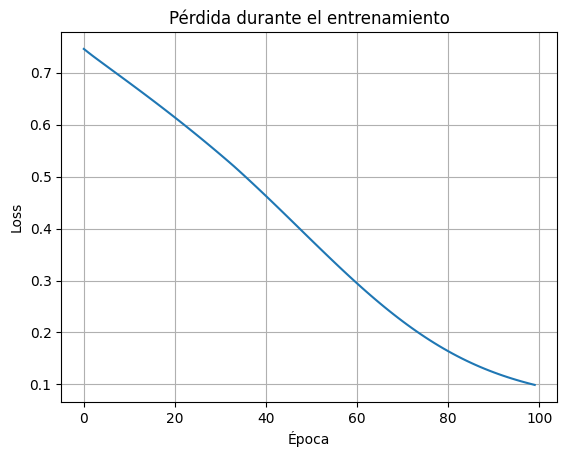

In [342]:
#Gráfica de pérdida
import matplotlib.pyplot as plt

plt.plot(loss_values)
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

El valor de pérdida baja de 0.7 a 0.1, lo cual indica que el modelo está aprendiendo correctamente con cada época

In [343]:
from sklearn.metrics import accuracy_score, confusion_matrix

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_t)
    y_pred_labels = torch.argmax(y_pred_test, axis=1)

# Métrica de precisión
acc = accuracy_score(y_test, y_pred_labels.cpu().numpy())
print(f"Precisión en el conjunto de prueba: {acc:.4f}")

Precisión en el conjunto de prueba: 0.9873


# **6. Gráficos**

In [344]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_t)
    y_pred_labels = torch.argmax(y_pred_test, axis=1)

# Precisión general
accuracy = accuracy_score(y_test, y_pred_labels.cpu().numpy())
print(f"Precisión en test: {accuracy:.4f}")

# Reporte de métricas
print(classification_report(y_test, y_pred_labels.cpu().numpy(), target_names=["No éxito", "Éxito"]))

Precisión en test: 0.9873
              precision    recall  f1-score   support

    No éxito       0.99      1.00      0.99     10219
       Éxito       0.87      0.26      0.41       170

    accuracy                           0.99     10389
   macro avg       0.93      0.63      0.70     10389
weighted avg       0.99      0.99      0.98     10389



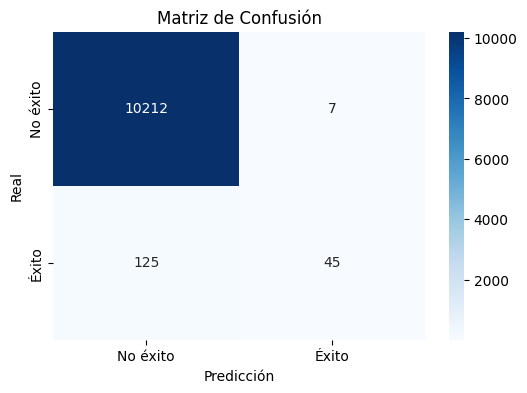

In [345]:
#Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_labels.cpu().numpy())

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No éxito", "Éxito"], yticklabels=["No éxito", "Éxito"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

El modelo acierta muy bien con los “No éxito”, pero tiene dificultades para identificar los casos de “Éxito”

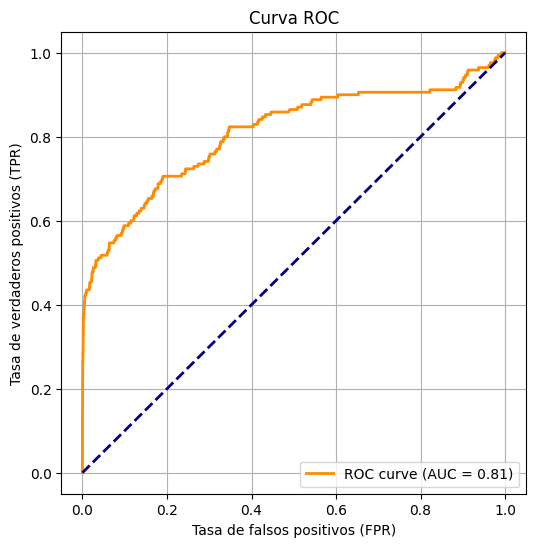

In [346]:
#gráfico muestra la Curva ROC

from sklearn.metrics import roc_curve, auc

# Obtener probabilidades predichas para clase 1
y_prob = torch.softmax(y_pred_test, dim=1)[:, 1].cpu().numpy()
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Aunque la matriz de confusión mostró pocos aciertos para la clase “Éxito”, esta curva indica que el modelo sí es capaz de distinguir bien entre clases si ajustamos mejor el umbral de decisión

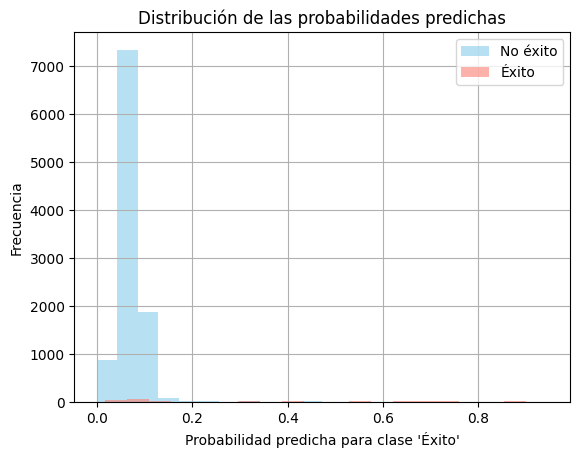

In [347]:
#Distribución de las probabilidades predichas para la clase "Éxito"
y_probs = y_prob  # ya obtenido antes

plt.hist(y_probs[y_test == 0], bins=20, alpha=0.6, label="No éxito", color='skyblue')
plt.hist(y_probs[y_test == 1], bins=20, alpha=0.6, label="Éxito", color='salmon')
plt.xlabel("Probabilidad predicha para clase 'Éxito'")
plt.ylabel("Frecuencia")
plt.title("Distribución de las probabilidades predichas")
plt.legend()
plt.grid(True)
plt.show()

El modelo sí está captando cierta diferencia entre clases, pero en general predice probabilidades bajas para todos los casos

# **7. Interpretacion**

1. Regresión Logística: Este modelo es simple y rápido que funciona bien en problemas lineales y es fácil de interpretar, pero en este caso obtuvo una precisión menor que la red neuronal, mostrando limitaciones para capturar relaciones complejas en los datos.

2. Redes neuronales: Al ser un modelo más complejo y capaz de aprender relaciones no lineales, superó en precisión a la regresión logística en este proyecto, demostrando ser una mejor alternativa cuando se busca mayor rendimiento predictivo, aunque a costa de mayor tiempo de entrenamiento y menor interpretabilidad

En conclusion, la regresión logística es más simple y rápida, pero limitada y la red neuronal es más potente, pero necesita más recursos, ademas fue la mejor alternativa debido a su mayor precisión.